# Problem

Synthetic Data Generation

## About

In this problem we have transaction data where target is having two category, 1. whether it a fraud or 2.  not fraud. Where we have 492 frauds out of 284,807 transactions. Which makes dataset highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. When we go for making a model using this  data set then model will be skewed towards majority class as it have more data from majority class it will learn majority class pattern mostly.  Due to this it become very important to do some method so that our data will become balanced and one of technique is to generate synthetic data.  

In [1]:
# -*- coding: utf-8 -*-

Synthetic Data Generation.<br>
Models: GAN model is used<br>

#Copyright@ H2HDATA

The entire prcess occurs in seven stages-
1. DATA INGESTION
2. DATA ANALYSIS 
3. DATA MUNGING
4. DATA EXPLORATION
5. DATA MODELING
6. HYPER-PARAMETERS OPTIMIZATION
7. PREDICTION
8. VISUAL ANALYSIS
9. RESULTS


Used library
1. pandas
2. numpy
3. time
4. sklearn
5. matplotlib
6. GAN
7. Keras



In [2]:
import GAN
import importlib
from GAN import *
import matplotlib.pyplot as plt

/usr/lib64/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data Ingestion

In [3]:
import pandas as pd 
train = pd.read_csv('../Data/creditcard.csv')
train_start = train

In [4]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Description

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null int64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26    

## Data Munging

In [6]:
train1= train
#train1 = train1.duplicated(keep='first')
print 'Normal duplicates', sum(train1.loc[ train1.Class==0 ].duplicated())
print 'Fraud duplicates', sum( train1.loc[ train1.Class==1 ].duplicated() )
print 'Length of data', len(train1)

Normal duplicates 1062
Fraud duplicates 19
Length of data 284807


In [7]:
train = train.drop_duplicates(subset=None, keep='first', inplace=False)
len(train)

283726

In [8]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


From above as we can see that data does some duplicates, so 1st task is to delete dupliacates.

## Data Analysis

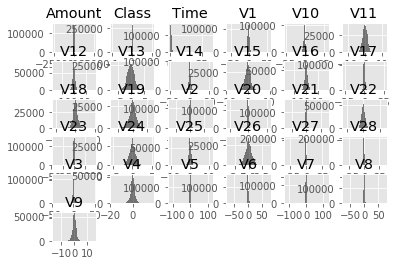

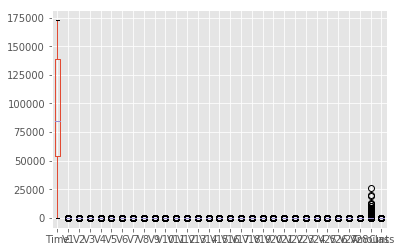

In [9]:
plt.figure()
train.diff().hist(color='k', alpha=0.5, bins=50)
plt.show()
train.plot.box()
plt.show()

In [10]:
train.skew()

Time      -0.035581
V1        -3.273271
V2        -4.695162
V3        -2.151984
V4         0.671504
V5        -2.414079
V6         1.829880
V7         2.890271
V8        -8.310970
V9         0.537663
V10        1.252967
V11        0.344074
V12       -2.199008
V13        0.064293
V14       -1.918804
V15       -0.309659
V16       -1.051161
V17       -3.690497
V18       -0.248661
V19        0.108312
V20       -2.043121
V21        2.820033
V22       -0.182330
V23       -5.867221
V24       -0.552129
V25       -0.415744
V26        0.580292
V27       -0.753804
V28       11.555115
Amount    16.978803
Class     24.430545
dtype: float64

In [11]:
train['Amount'].head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

In [12]:
train['V28'].head()

0   -0.021053
1    0.014724
2   -0.059752
3    0.061458
4    0.215153
Name: V28, dtype: float64

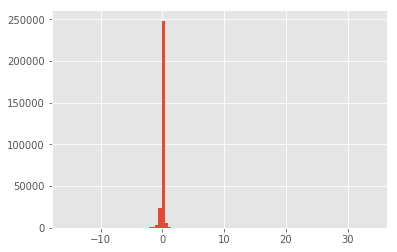

In [13]:
plt.figure()
plt.hist(train['V28'],bins=100)
plt.show()

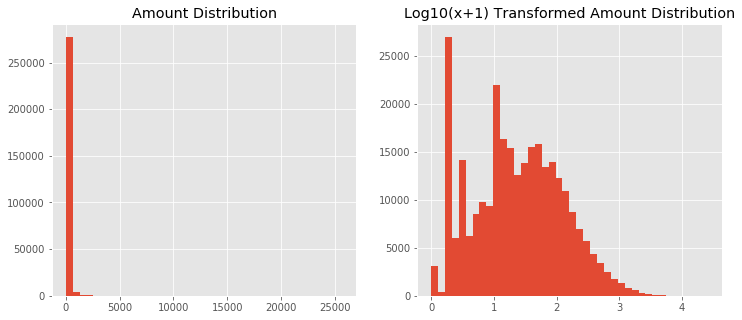

In [14]:
# Here log will represent amount in more normal distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(train['Amount'], bins=40)
plt.title('Amount Distribution')

plt.subplot(1,2,2)
d0 = np.log10( train['Amount'].values + 1 )
plt.hist( d0, bins=40 )
plt.title('Log10(x+1) Transformed Amount Distribution')
plt.show()

## Data Exploration

1. Log of Amount
2. Center and scale all data, only using the middle 99.8%. So that outlier doesn't affect much.

In [15]:
d_log = np.log10( train['Amount'].values + 1 )
train['Amount'] = d_log

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
data_cols = list(train.columns[ train.columns != 'Class' ])
percentiles =  pd.DataFrame( np.array([ np.percentile( train[i], [ 0.1, 99.9 ] ) for i in data_cols ]).T,
                        columns=data_cols, index=['min','max'] )

percentile_means = \
    [ [ np.mean( train.loc[ (train[i]>percentiles[i]['min']) & (train[i]<percentiles[i]['max']) , i ] ) ]
     for i in data_cols ]

percentiles = percentiles.append( pd.DataFrame(np.array(percentile_means).T, columns=data_cols, index=['mean']) )

percentile_stds = \
    [ [ np.std( train.loc[ (train[i]>percentiles[i]['min']) & (train[i]<percentiles[i]['max']) , i ] ) ]
     for i in data_cols ]

percentiles = percentiles.append( pd.DataFrame(np.array(percentile_stds).T, columns=data_cols, index=['stdev']) )
train[data_cols] = ( train[data_cols] - percentiles.loc[ 'mean', data_cols ] ) / percentiles.loc[ 'stdev', data_cols ]


/usr/lib64/python2.7/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [17]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,-0.000385,-0.011126,-0.009103,-0.008162,0.002726,-0.002011,0.000536,-0.000663,-0.011288,0.002165,...,0.004767,-0.001410,-0.004726,-0.000147,-0.001004,0.002363,-0.003311,0.004553,-0.009179,0.001667
std,1.002372,1.079540,1.155157,1.065761,1.023044,1.142194,1.054491,1.210402,1.242664,1.030450,...,1.323153,1.029046,1.440422,1.014831,1.031032,1.017350,1.218741,1.483283,1.013176,0.040796
min,-2.001941,-31.273830,-51.016081,-34.147384,-4.106427,-94.350778,-20.709867,-42.947217,-77.177120,-12.632785,...,-63.657097,-15.529230,-103.487287,-4.753758,-20.365989,-5.494732,-69.502449,-69.770230,-1.937460,0.000000
25%,-0.857625,-0.521999,-0.427326,-0.637790,-0.610129,-0.575724,-0.607404,-0.547179,-0.230482,-0.602305,...,-0.411849,-0.772161,-0.378633,-0.594453,-0.628566,-0.687571,-0.226288,-0.236756,-0.783663,0.000000
50%,-0.213999,-0.003109,0.038658,0.117827,-0.011223,-0.047877,-0.216412,0.037846,0.012692,-0.045806,...,-0.048367,0.008091,-0.030954,0.068223,0.031656,-0.108058,-0.004187,0.053119,-0.020348,0.000000
75%,0.938777,0.714922,0.555194,0.716161,0.539944,0.504292,0.315579,0.560014,0.332888,0.564259,...,0.345767,0.748853,0.336037,0.736351,0.693115,0.509108,0.272146,0.356030,0.730315,0.000000
max,1.645869,1.346046,15.467232,6.618709,12.212769,28.863591,58.034427,118.891434,21.076202,14.672747,...,49.726457,14.915666,52.023499,7.681688,14.874041,7.425238,97.344804,153.056313,4.270889,1.000000


In [18]:
train_model= train
train = train.loc[ train['Class']==1 ].copy()

label_cols = [ i for i in train.columns if 'Class' in i ]
data_cols = [ i for i in train.columns if i not in label_cols ]
train[ data_cols ] = train[ data_cols ] / 10 
train_no_label = train[data_cols]

## Modeling

In [19]:
data_dim = 32 # 32 # needs to be ~data_dim
base_n_count = 128 # 128
steps = 500 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64
k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting 
                                        #adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of 
                                    #image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = 'cache/'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None
show = True 


('data_dim: ', 30)
('data_cols: ', ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])


/usr/lib64/python2.7/site-packages/keras/engine/training.py:953: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Step: 0 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6708, 0.7377, 0.6551, 0.0000
D Real - D Gen: -0.0827
Generator model loss: 0.670765936375.
Discriminator model loss gen: 0.73770481348.
Discriminator model loss real: 0.65505450964.
svc loss: 0.0
(492, 30) real data
(492, 30) generated da
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'] []


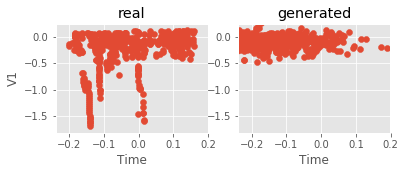

Step: 100 of 501.
Losses: G, D Gen, D Real, Xgb: 0.8087, 0.7642, 0.7181, 0.0000
D Real - D Gen: -0.0460
Generator model loss: 0.808676660061.
Discriminator model loss gen: 0.764167547226.
Discriminator model loss real: 0.718131899834.
svc loss: 0.0
(492, 30) real data
(492, 30) generated da
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'] []


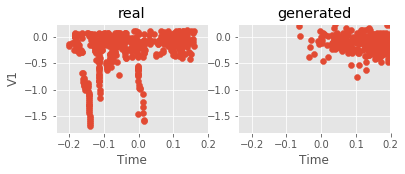

Step: 200 of 501.
Losses: G, D Gen, D Real, Xgb: 0.7900, 0.8503, 0.5442, 0.0000
D Real - D Gen: -0.3061
Generator model loss: 0.789958298206.
Discriminator model loss gen: 0.850347995758.
Discriminator model loss real: 0.544245123863.
svc loss: 0.0
(492, 30) real data
(492, 30) generated da
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'] []


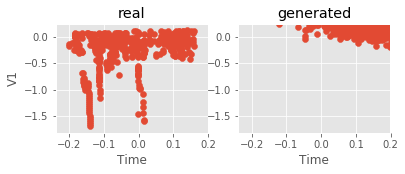

Step: 300 of 501.
Losses: G, D Gen, D Real, Xgb: 0.8745, 0.6598, 0.7306, 0.0000
D Real - D Gen: 0.0708
Generator model loss: 0.874529659748.
Discriminator model loss gen: 0.659767746925.
Discriminator model loss real: 0.730587482452.
svc loss: 0.0
(492, 30) real data
(492, 30) generated da
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'] []


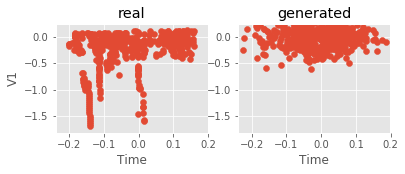

Step: 400 of 501.
Losses: G, D Gen, D Real, Xgb: 1.0953, 0.5416, 0.6716, 0.0000
D Real - D Gen: 0.1300
Generator model loss: 1.0953001976.
Discriminator model loss gen: 0.541582882404.
Discriminator model loss real: 0.67163169384.
svc loss: 0.0
(492, 30) real data
(492, 30) generated da
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'] []


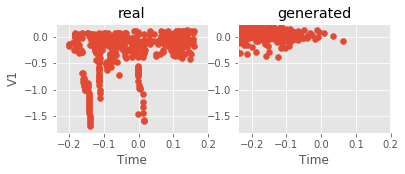

Step: 500 of 501.
Losses: G, D Gen, D Real, Xgb: 1.1564, 0.5946, 0.6875, 0.0000
D Real - D Gen: 0.0929
Generator model loss: 1.15637111664.
Discriminator model loss gen: 0.594561040401.
Discriminator model loss real: 0.687459886074.
svc loss: 0.0
(492, 30) real data
(492, 30) generated da
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'] []


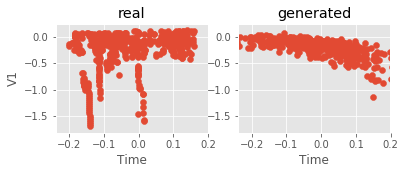

In [20]:

# Training the vanilla GAN 
k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [data_dim, steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN

## Prediction

In [21]:
generated_data = pd.read_csv('generated_data.csv')
generated_data['Class'] = [0]*len(generated_data)
generated_data.rename(columns=dict(zip(generated_data.columns, train_model.columns)), inplace=True)
data = train_model.append(generated_data)

from sklearn.utils import shuffle
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
data = shuffle(data)
clf_mlp = MLPClassifier(hidden_layer_sizes = (10,4) ,warm_start = True)
target = data['Class'].values
features = data.drop(['Class'],axis = 1).values
print  cross_val_score(clf_mlp,features,target,scoring = 'f1'), 'f1 score using mlp after data generation'

[0.78873239 0.74157303 0.81605351] f1 score using mlp after data generation
